In [6]:
## Importing the data from tiingo using pandas datareader
import pandas_datareader as pdr

df = pdr.get_data_tiingo('GOOGL',api_key = '1fb09ab6945c3ec3a50df8c02d5b65ecf8ce5975')


<ipython-input-6-c419cee1021f>:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('GOOGL',api_key = '1fb09ab6945c3ec3a50df8c02d5b65ecf8ce5975')


In [7]:
## Converting the data into CSV file
df.to_csv('COUR.csv')

In [8]:
# Importing pandas and dataframe
import pandas as pd

df = pd.read_csv('COUR.csv')

In [11]:
df.shape

(1257, 14)

In [49]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,GOOGL,2023-09-11 00:00:00+00:00,136.92,137.4800,135.785,136.54,20763350,136.92,137.4800,135.785,136.54,20763350,0.0,1.0
1253,GOOGL,2023-09-12 00:00:00+00:00,135.34,136.8701,135.190,136.26,18405505,135.34,136.8701,135.190,136.26,18405505,0.0,1.0
1254,GOOGL,2023-09-13 00:00:00+00:00,136.71,136.9000,134.150,135.09,20749496,136.71,136.9000,134.150,135.09,20749496,0.0,1.0
1255,GOOGL,2023-09-14 00:00:00+00:00,138.10,138.6950,136.240,137.60,24750968,138.10,138.6950,136.240,137.60,24750968,0.0,1.0
1256,GOOGL,2023-09-15 00:00:00+00:00,137.40,138.5200,136.480,137.98,38919614,137.40,138.5200,136.480,137.98,38919614,0.0,1.0


In [41]:
new_df = df['close']

In [42]:
new_df.head()

0    1167.11
1    1174.27
2    1191.57
3    1172.12
4    1179.56
Name: close, dtype: float64

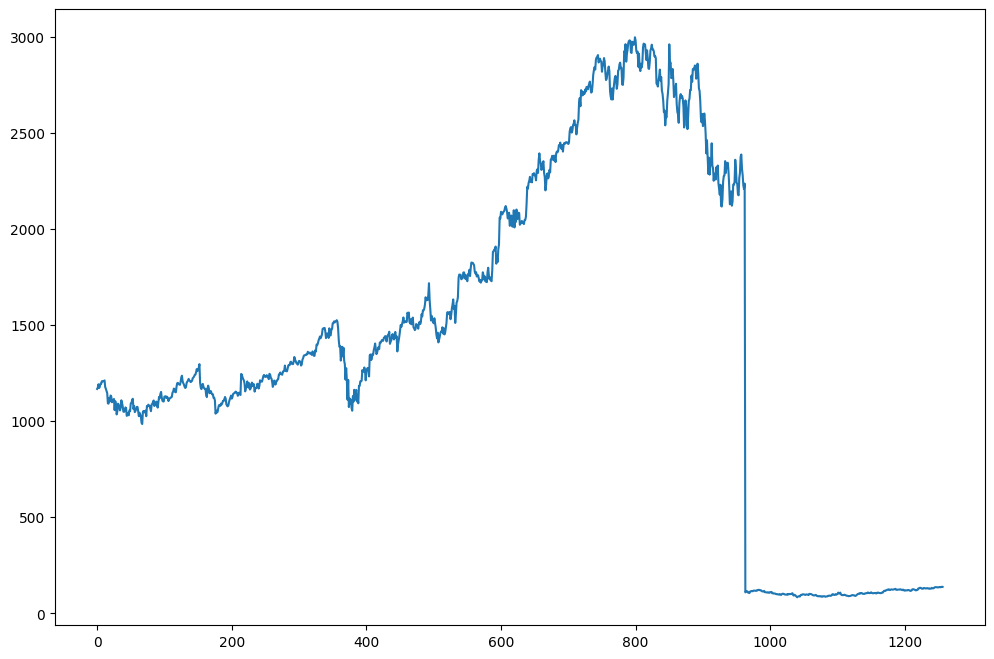

In [44]:
## Analysing the Stock Price of Google
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(new_df)

In [45]:
# Scaling the data
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

new_df = scaler.fit_transform(np.array(new_df).reshape(-1,1))

In [53]:
new_df

array([[0.37197169],
       [0.37442935],
       [0.38036755],
       ...,
       [0.01828829],
       [0.0187654 ],
       [0.01852513]])

In [51]:
## Making the train and test data for our model
train_size = int(len(new_df)*0.70)
test_size = len(new_df) - train_size
train_data,test_data = new_df[:train_size,:],new_df[train_size:len(new_df),:]

In [54]:
train_data.shape

(879, 1)

In [56]:
test_data.shape

(378, 1)

In [57]:
new_df.shape

(1257, 1)

In [60]:
## Creating a fuction which can create consumable data in a time-series format for our model
def create_dataset(data,timestep):

  x,y = [],[]
  for i in range(len(data)-timestep-1):
    a = data[i:(i+timestep),0]
    x.append(a)
    y.append(data[i+timestep,0])

  return np.array(x),np.array(y)

In [61]:
x_train,y_train = create_dataset(train_data,100)
x_test,y_test = create_dataset(test_data,100)

In [63]:
x_train.shape

(778, 100)

In [65]:
y_train.shape

(778,)

In [66]:
## Reshape the data
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [68]:
x_train.shape

(778, 100, 1)

In [82]:
## Building the LSTM model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

model = Sequential()

model.add(LSTM(50,return_sequences = True,input_shape= (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss = 'mse',optimizer = 'adam')

In [83]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_17 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_18 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [84]:
## Training our model
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs = 10)

Epoch 1/10
25/25 [==============================] - 13s 256ms/step - loss: 0.0537 - val_loss: 0.0265
Epoch 2/10
25/25 [==============================] - 4s 167ms/step - loss: 0.0037 - val_loss: 0.0060
Epoch 3/10
25/25 [==============================] - 4s 167ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/10
25/25 [==============================] - 5s 222ms/step - loss: 9.0712e-04 - val_loss: 0.0023
Epoch 5/10
25/25 [==============================] - 4s 170ms/step - loss: 8.5555e-04 - val_loss: 0.0022
Epoch 6/10
25/25 [==============================] - 4s 170ms/step - loss: 8.2435e-04 - val_loss: 0.0018
Epoch 7/10
25/25 [==============================] - 5s 217ms/step - loss: 9.1197e-04 - val_loss: 0.0019
Epoch 8/10
25/25 [==============================] - 4s 168ms/step - loss: 8.1153e-04 - val_loss: 0.0016
Epoch 9/10
25/25 [==============================] - 4s 172ms/step - loss: 8.1827e-04 - val_loss: 0.0014
Epoch 10/10
25/25 [==============================] - 5s 200ms/step - loss: 

In [85]:
## Predicting with respect to train and test data
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

9/9 [==============================] - 0s 43ms/step


In [88]:
y_train.shape

(778,)

In [95]:
## Calculating the error of our model
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(y_train,train_predict))

0.028661067322584676

In [96]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.034715570531054264

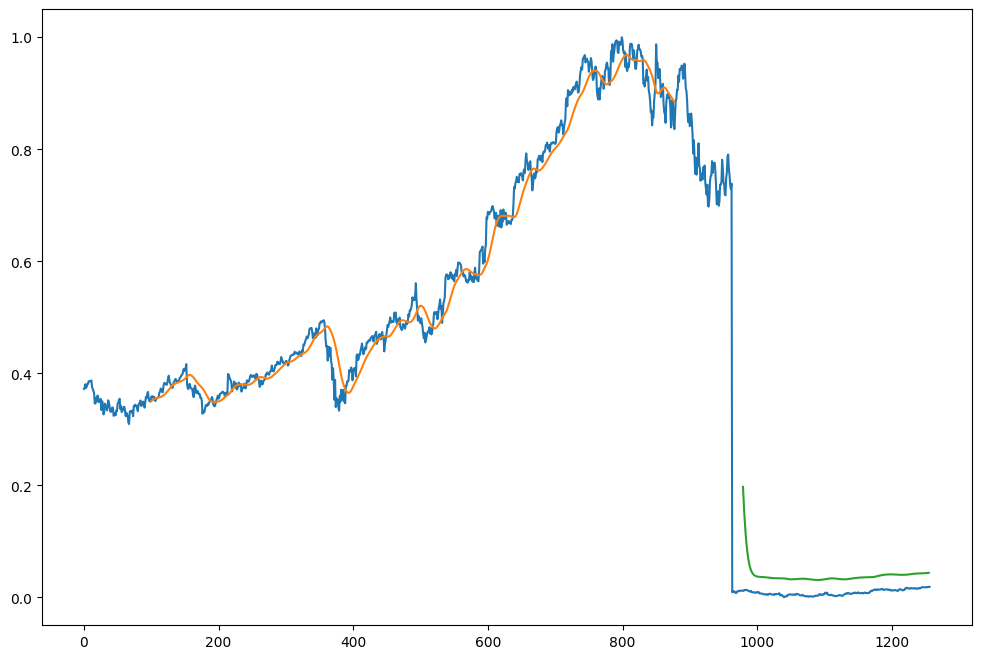

In [102]:
# Visulaising the predicted output with the actual output

look_back = 100

trainpredictplot = np.empty_like(new_df)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict

testpredictplot = np.empty_like(new_df)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2
)+1:len(new_df)-1,:] = test_predict


plt.figure(figsize = (12,8))
plt.plot(new_df)
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()


In [103]:
len(test_data)

378

In [104]:
x_input = test_data[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [110]:
temp_input = x_input[0].tolist()

In [112]:
## Predicting the output for next 30 days
list_out = []
n_steps = 100
i = 0

while i<30:

  if len(temp_input) > 100:
    x_input = np.array(temp_input[1:])

    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1,n_steps,1))

    yhat = model.predict(x_input,verbose = 0)

    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    list_out.extend(yhat.tolist())
    i = i+1


  else:
    x_input = x_input.reshape((1,n_steps,1))
    yhat = model.predict(x_input,verbose = 0)

    temp_input.extend(yhat[0].tolist())

    list_out.extend(yhat.tolist())
    i = i+1

In [113]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [114]:
len(new_df)

1257

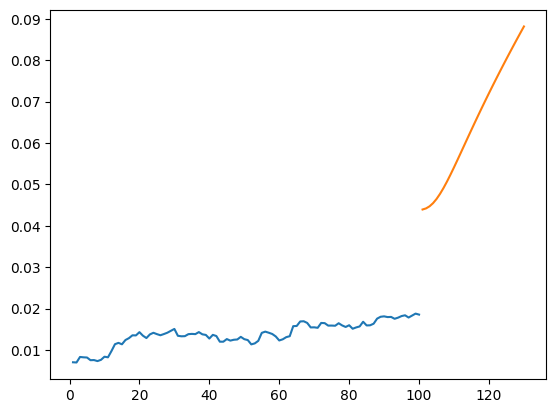

In [115]:
## Ploting the next 30 days stock prediction
plt.plot(day_new,new_df[1157:])
plt.plot(day_pred,list_out)

In [116]:
curr_df  = new_df.tolist()
curr_df.extend(list_out)

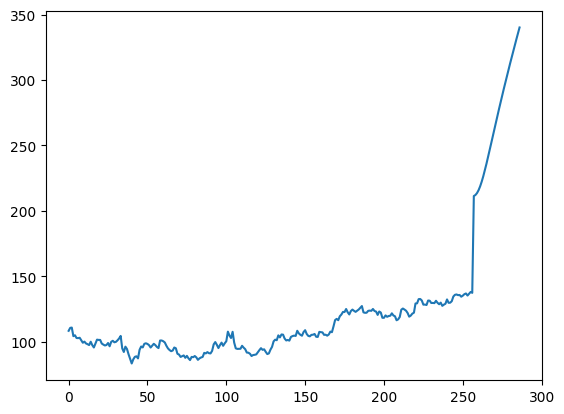

In [123]:
## Plotting the next 30 days stock price in a smooth curve
plt.plot(scaler.inverse_transform(curr_df[1000:]))